# Handwritten Digit Recognition

This project aims to use the MNIST dataset and a Convolutional Neural Network to read handwritten digits and classify them properly

### Imports: 

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape data to fit the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [17]:
model = Sequential([
    
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(10, activation='softmax')
])

D:\PROJECTS\MNIST\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
  1/938 ━━━━━━━━━━━━━━━━━━━━ 35:37 2s/step - accuracy: 0.0625 - loss: 4.0645

D:\PROJECTS\MNIST\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.5503 - loss: 1.4742 - val_accuracy: 0.9508 - val_loss: 0.1585
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8450 - loss: 0.4813 - val_accuracy: 0.9623 - val_loss: 0.1135
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8798 - loss: 0.3764 - val_accuracy: 0.9668 - val_loss: 0.1043
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.8968 - loss: 0.3307 - val_accuracy: 0.9597 - val_loss: 0.1209
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9051 - loss: 0.3009 - val_accuracy: 0.9662 - val_loss: 0.0978
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9121 - loss: 0.2785 - val_accuracy: 0.9688 - val_loss: 0.0887
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9145 - loss: 0.2637 - val_accuracy: 0.9745 - val_loss: 0.0732
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9199 - loss: 0.2553 - val_accurac

In [24]:
model.save("my_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')


In [67]:
# import pickle

# with open('history.pkl', 'wb') as f:
#     pickle.dump(history.history, f)


In [ ]:
import pickle

# Load the saved history from file
with open('history.pkl', 'rb') as f:
    saved_history = pickle.load(f)

In [21]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy*100)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9801 - loss: 0.0596
Test Loss: 0.05225103721022606
Test Accuracy: 98.25999736785889


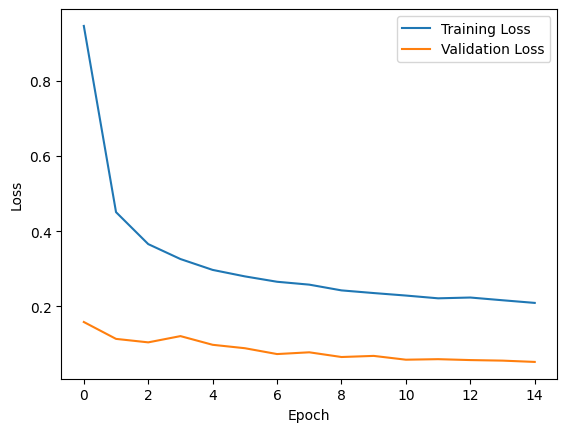

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [23]:
from PIL import Image
import numpy as np

# Load the image
img_path = 'number.jpg'
img = Image.open(img_path)

# Convert the image to grayscale
img_gray = img.convert('L')

# Resize the image to match the input size of your model
img_resized = img_gray.resize((28, 28))

# Convert the image to a numpy array
img_array = np.array(img_resized)

# Expand the dimensions to match the expected input shape of the model
img_array = np.expand_dims(img_array, axis=0)
img_array = np.expand_dims(img_array, axis=-1)


# Normalize pixel values (if necessary)
img_array = img_array / 255.0

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(prediction)

print("Predicted Number:", predicted_class)
# print("Predicted Number:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Number: 8
